In [151]:
from matplotlib import pyplot
import matplotlib
import sys
%matplotlib nbagg

In [2]:
import numpy

In [4]:
def arc_dist(lat1, lon1, lat2, lon2):
    return numpy.arctan2(numpy.sqrt((numpy.cos(lat2)*numpy.sin(numpy.abs(lon2-lon1)))**2 +
                                    (numpy.cos(lat1)*numpy.sin(lat2) - numpy.sin(lat1)*numpy.cos(lat2)*numpy.cos(numpy.abs(lon2-lon1)))**2)
                         ,numpy.sin(lat1)*numpy.sin(lat2) + numpy.cos(lat1)*numpy.cos(lat2)*numpy.cos(numpy.abs(lat2-lat1)))
    #return numpy.arccos(numpy.sin(lat1)*numpy.sin(lat2) + numpy.cos(lat1)*numpy.cos(lat2)*numpy.cos(lon2-lon1))


In [ ]:
import scipy.signal
b, a=scipy.signal.butter(2, 1/3, btype="low")
scipy.signal.lfilter(b, a, )

In [11]:
days = numpy.arange(19, 27)
chance = numpy.array((0.95, 0.97, 0.25, 0.51, 0.45, 0.65, 0.9, 0.95))


<IPython.core.display.Javascript object>


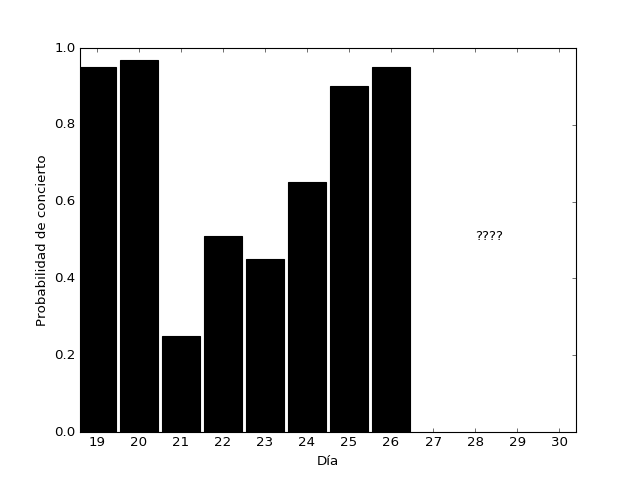

In [24]:
fig, ax = pyplot.subplots()

ax.bar(days, chance, color = "black", align = "center", width=0.9)
ax.set_xbound(18.6, 30.4)
ax.text(28, 0.5, "????")
ax.set_xlabel("Día")
ax.set_ylabel("Probabilidad de concierto")
ax.set_xticks(numpy.arange(19,31))

***EPISODE 2***

In [10]:
import numpy, numpy.random
from matplotlib import pyplot

%matplotlib nbagg

In [12]:
gridshape = (20, 20)
angles=numpy.random.uniform(0, 2*numpy.pi, gridshape)

dx, dy = numpy.cos(angles), numpy.sin(angles)

<IPython.core.display.Javascript object>


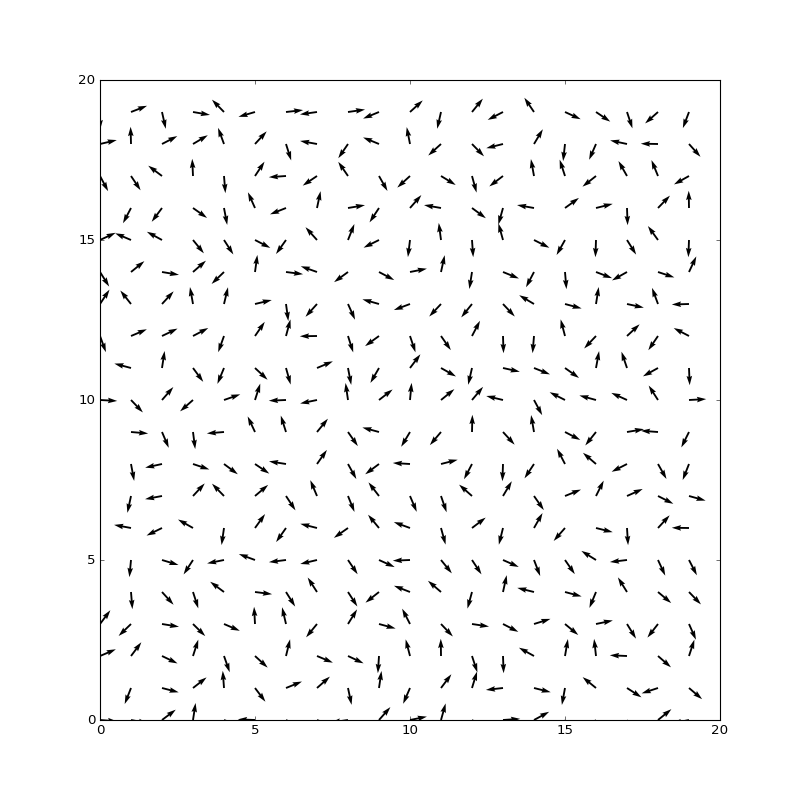

In [17]:
fig, ax = pyplot.subplots(figsize=(10,10))

ax.quiver(dx, dy)

pyplot.show(fig)

In [165]:
import scipy.interpolate

gridshape = (20, 20)
pixelshape = (400, 400)

angles=numpy.random.uniform(0, 2*numpy.pi, gridshape)

!mkdir oslo_frames

for i in range(400):
    
    sys.stdout.write("\rframe{0} out of {1}".format(i+1, 400))
    
    angles += numpy.random.normal(0, numpy.pi/6, gridshape)
    dx, dy = numpy.cos(angles), numpy.sin(angles)
    

    pixels = numpy.empty(pixelshape)

    x = numpy.linspace(0, pixelshape[0], gridshape[0])
    y = numpy.linspace(0, pixelshape[1], gridshape[1])

    px, py = numpy.arange(pixelshape[0]), numpy.arange(pixelshape[1])

    dx_p = numpy.roll(scipy.interpolate.interp2d(x, y, dx, kind="cubic")(px, py), 1, axis=0)
    dy_p = numpy.roll(scipy.interpolate.interp2d(x, y, dy, kind="cubic")(px, py), 1, axis=1)

    px_g, py_g = numpy.meshgrid(px, py)

    ratio_x = pixelshape[0] / gridshape[0]
    ratio_y = pixelshape[1] / gridshape[1]

    x_0 = numpy.uint8(numpy.floor(px_g / ratio_x)*ratio_x)
    y_0 = numpy.uint8(numpy.floor(py_g / ratio_y)*ratio_y)

    x_1 = numpy.uint8(numpy.ceil(px_g / ratio_x)*ratio_x % pixelshape[0])
    y_1 = numpy.uint8(numpy.ceil(py_g / ratio_y)*ratio_y % pixelshape[0])

    dist_x0 = (px_g - x_0); dist_y0 = (py_g - y_0)
    dist_x1 = -(px_g - x_1); dist_y1 = -(py_g - y_1)

    weights_x = (dist_x1 - dist_x0) / ratio_x
    weights_y = (dist_y1 - dist_y0) / ratio_y

    val_y0 = (dist_x0 * dx_p[x_0, y_0] * weights_x + dist_x1 * dx_p[x_1, y_0] * (1-weights_x))
    val_y1 = (dist_x0 * dx_p[x_0, y_1] * weights_x + dist_x1 * dx_p[x_1, y_1] * (1-weights_x))
    val = (val_y0 * weights_y + val_y1 * (1 - weights_y))
    
    pyplot.imsave(fname = "oslo_frames/frame_{0:05d}.png".format(i), arr = val[:190, :190], cmap="Greys")   
    

mkdir: no se puede crear el directorio «oslo_frames»: El fichero ya existe
frame400 out of 400

<IPython.core.display.Javascript object>


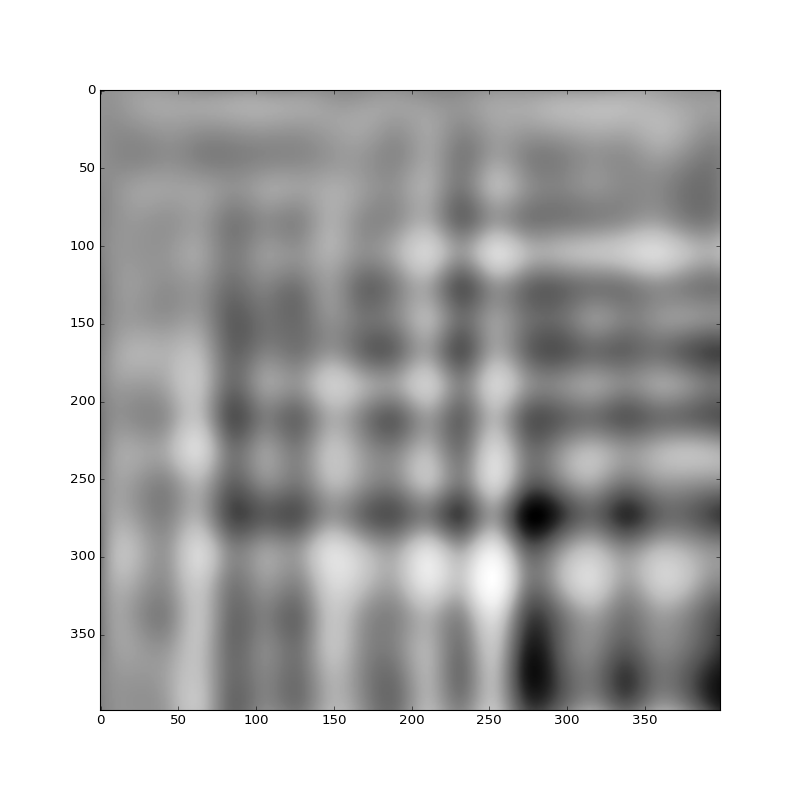

In [175]:
fig, ax = pyplot.subplots(figsize=(10,10))

ax.imshow(val, cmap="Greys")
pyplot.show(fig)

In [174]:
dx_p = scipy.interpolate.interp2d(x, y, dx, kind="cubic")(px,py)
dy_p = scipy.interpolate.interp2d(x, y, dy, kind="cubic")(px,py)

val=scipy.integrate.cumtrapz(dx_p, axis=0)[:, :399]+scipy.integrate.cumtrapz(dy_p, axis=1)[:399, :]